In [99]:
import numpy as np
import random

def g(I):
    if(I.ndim == 2):
        xx = len(I[0])
        sum = np.zeros(len(I))
        for i in range(1, xx):
            sum = sum + I[:, i] / (xx - 1)
    if (I.ndim == 1):
        xx = len(I)
        sum = np.zeros(1)
        for i in range(1, xx):
            sum = sum + I[i] / (xx - 1)

    return 1 + 9 * sum
    

def f1(I):
    if(I.ndim == 2):
        return I[:, 0]
    if(I.ndim == 1):
        return I[0]

# ZDT1
def f2(I):
    if (I.ndim == 2):
        return g(I)*(1-I[:,0]/g(I)*I[:,0]/g(I))
    if (I.ndim == 1):
        return (g(I)*(1-I[0]/g(I)*I[0]/g(I)))[0]


def Dominates(individual_1, individual_2):
    # Проверка, что individual_1 и individual_2 - это массивы (сектора)
    if isinstance(individual_1, np.ndarray) and isinstance(individual_2, np.ndarray):
        for i in range(len(individual_1)):  # Индексация массивов
            if individual_1[i] > individual_2[i]:
                return False
        return any(val_1 < val_2 for val_1, val_2 in zip(individual_1, individual_2))
    else:
        raise ValueError("individual_1 and individual_2 should be numpy arrays")

def non_dom_sort(I, flag):
    population1 = np.array([])
    I1 = np.array([])

    # Заполняем список `population` значениями функций f1 и f2
    population = np.vstack((f1(I), f2(I))).T

    while len(population)>0:
        c = 0

        for i in range(len(population)):
            c = 0
            for j in range(len(population)):
                if i != j and Dominates(population[j], population[i]):
                    c += 1

            if c == 0:
                population1 =np.append(population1,population[i])
                I1 = np.append(I1, I[i])


        # Удаление элементов из `population` и `I`, основываясь на `population1` и `I1`
        population = population[~np.isin(population, population1)].reshape(-1,2)
        I = I[~np.isin(I, I1)].reshape(-1,2)

        #print('result', ~np.isin(population, population1))
        #print(population)
        # Если флаг установлен, выводим и выходим из функции
        if flag:
            return I1.reshape(-1,2)
    return I1.reshape(-1,2)


In [100]:
P = 500
iters = 20
it = 10
M = 100
C = 1.6
#a = np.array([-10,-10])
#b = np.array([10,10])
#a = np.array([-15, -3])
#b = np.array([-5, 3])
a = np.array([0, 0])
b = np.array([1, 1])
n = 2
x = np.random.uniform(a, b, (P,2))
# y = np.zeros(P,2)
# for i in range (P):
#     y[i,0] = f1(x[i])
#     y[i,1] = f2(x[i])
x = non_dom_sort(x,False)
best = random.choices(non_dom_sort(x,True))[0]
print(best)

def calculate(worse, best, C, border_0, border_1):  
    sol = border_1+1
    rand = np.random.uniform(0, 1)
    
    while any((sol < border_0) | (sol > border_1)):
        rand = np.random.uniform(0, 1)
        sol = worse + C * rand * (best - worse)
    return sol

def distribute(x, M):
    groups = [[] for _ in range(M)]
    for i, x_i in enumerate(x):
        groups[i % M].append(x_i)
    # Преобразуем каждую группу в массив NumPy
    groups = [np.array(group) for group in groups]
    return np.array(groups, dtype=object)


x = distribute(x,M)


[0.44798794 0.01798918]


In [101]:

for j in range(iters):
    print("итерация №",j)
    for i in range(it):
        #print("it",i)
        for group_idx, row in enumerate(x):
            row = non_dom_sort(x,False)
            worse = row[-1]
            #print("worse",f1(worse),f2(worse)) 
            #best_row = best = random.choices(non_dom_sort(row,True))[0]
            best_row = row[0]
            #print("best_row",f1(best_row),f2(best_row)) 
            l = np.random.uniform(0, 1, 2) 
            arr1 = np.array([f1(l),f2(l)])
            arr2 = np.array([f1(worse),f2(worse)])
            arr3 = np.array([f1(calculate(worse, best_row, C, a, b)),f2(calculate(worse, best_row, C, a, b))])
            #print('arr1',arr1)
            #print('arr2',arr2)
            if Dominates(arr1,arr2):
            # Применяем правила обновления
            #if function(calculate(worse, best_row, C, a, b)) < function(worse):
                worse = l
            #elif Dominates(np.array([f1(calculate(worse, best, C, a, b)),f2(calculate(worse, best, C, a, b))]),np.array([f1(worse),f2(worse)])):
                #worse = calculate(worse, best, C, a, b)
            elif Dominates(arr3,arr2):
                worse = calculate(worse, best_row, C, a, b)
                # while(not Dominates(np.array([f1(worse1),f2(worse1)]),np.array([f1(worse),f2(worse)]))):
                #     print('here')
                #     worse1 = np.random.uniform(0, 1, 2)
            else:
                worse = np.random.uniform(0, 1, 2) 
            
            #print("new worse", f1(worse),f2(worse))

            # Пересортируем строку после изменений
            row[-1] = worse

            # Сохраняем изменения в исходный массив
            x[group_idx] = row

    # Преобразуем массив обратно в одномерный и пересортируем
    x = np.concatenate(x)  # Преобразуем обратно в одномерный массив
    #print(np.array([f1(x),f2(x)]).reshape(-1,2))
    x = non_dom_sort(x,False)

    # Обновляем лучшее и худшее решение
    #best = random.choices(non_dom_sort(x,True))[0]
    #worse = x[-1]
    #print(np.array([f1(x),f2(x)]).reshape(-1,2))
    # Снова распределяем элементы по группам
    x = distribute(x, M)

x = non_dom_sort(x,True).reshape(-1,2)    
print(x)


итерация № 0
итерация № 1
итерация № 2
итерация № 3
итерация № 4
итерация № 5
итерация № 6
итерация № 7
итерация № 8
итерация № 9
итерация № 10
итерация № 11
итерация № 12
итерация № 13
итерация № 14
итерация № 15
итерация № 16
итерация № 17
итерация № 18
итерация № 19
[[0.07336810527148278 7.52464745972306e-08]
 [0.07336810527148278 7.52464745972306e-08]
 [0.07336822059826541 5.219821368918416e-07]
 [0.07336824646772577 5.405659707889159e-07]
 [0.07396355580403384 0.0017293549402550984]]


In [102]:
import matplotlib.pyplot as plt

data = np.array([f1(x),f2(x)])
print(data)


[[0.07336810527148278 0.07336810527148278 0.07336822059826541
  0.07336824646772577 0.07396355580403384]
 [0.9946178019925255 0.9946178019925255 0.9946218273333366
  0.9946219916921719 1.0101774275626683]]


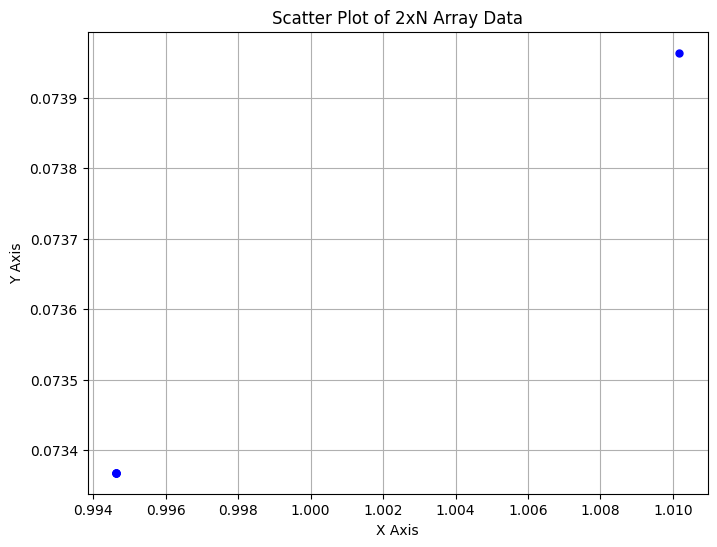

In [103]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(data[1, :], data[0, :], 'o', markersize=5, color='blue')  # график с точками
plt.xlabel('X Axis')  # метка оси X
plt.ylabel('Y Axis')  # метка оси Y
plt.title('Scatter Plot of 2xN Array Data')  # заголовок графика
plt.grid(True)  # сетка
plt.show()